In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Adding Layers
The neural network we’ve built is becoming more respectable, but at the moment, we have only
one layer. Neural networks become “deep” when they have 2 or more ​ hidden layers​ . At the
moment, we have just one layer, which is effectively an output layer. Why we want two or more
hidden​ layers will become apparent in a later chapter. Currently, we have no hidden layers. A
hidden layer isn’t an input or output layer; as the scientist, you see data as they are handed to the
input layer and the resulting data from the output layer. Layers between these endpoints have
values that we don’t necessarily deal with, hence the name “hidden.” Don’t let this name convince
you that you can’t access these values, though. You will often use them to diagnose issues or
improve your neural network. To explore this concept, let’s add another layer to this neural
network, and, for now, let’s assume these two layers that we’re going to have will be the hidden
layers, and we just have not coded our output layer yet.

Before we add another layer, let’s think about what will be coming. In the case of the first layer,
we can see that we have an input with 4 features.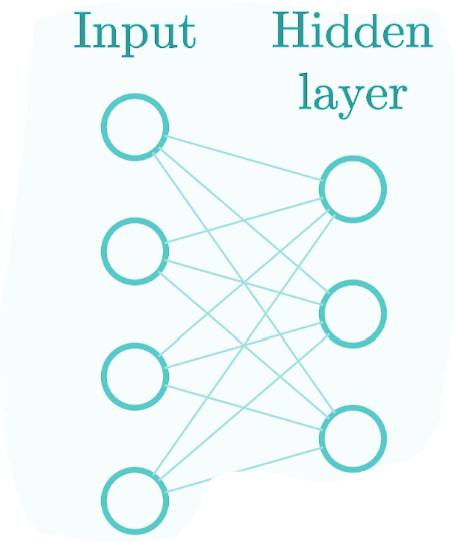
Samples (feature set data) get fed through the input, which does not change it in any way, to our
first hidden layer, which we can see has 3 sets of weights, with 4 values each.
Each of those 3 unique weight sets is associated with its distinct neuron. Thus, since we have 3
weight sets, we have 3 neurons in this first hidden layer. Each neuron has a unique set of weights,
of which we have 4 (as there are 4 inputs to this layer), which is why our initial weights have a
shape of ​ (3,4) ​ .
Now, we wish to add another layer. To do that, we must make sure that the expected input to
that layer matches the previous layer’s output. We have set the number of neurons in a layer by
setting how many weight sets and biases we have. The previous layer’s influence on weight sets
for the current layer is that each weight set needs to have a separate weight per input. This
means a distinct weight per neuron from the previous layer (or feature if we’re talking the
input). The previous layer has 3 weight sets and 3 biases, so we know it has 3 neurons. This then
means, for the next layer, we can have as many weight sets as we want (because this is how
many neurons this new layer will have), but each of those weight sets must have 3 discrete
weights.
To create this new layer, we are going to copy and paste our ​ weights​ a ​ nd ​ biases​ to ​ weights2
and ​ biases2​ , and change their values to new made up sets. Here’s an example:

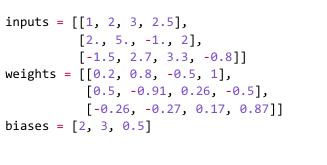
layer1_outputs  =  np.dot(inputs, np.array(weights).T)  + biases

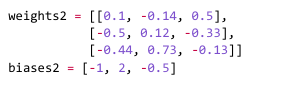

Next, we will now call ​ outputs ​ “ ​ layer1_ouputs ” ​ ​ :
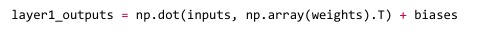
As previously stated, inputs to layers are either inputs from the actual dataset you’re training with
or outputs from a previous layer. That’s why we defined 2 versions of ​ weights ​ and ​ biases ​ but only
1 of ​ inputs ​ — because the inputs for layer 2 will be the outputs from the previous layer:

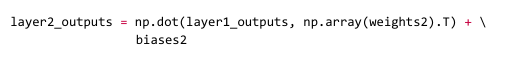
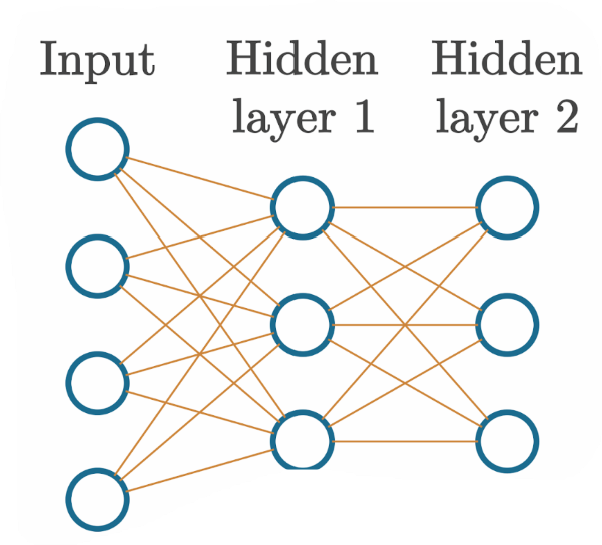
Figure B5: 4 features input into 2 hidden layers of 3 neurons each


In [1]:
import numpy as np

inputs = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]

weights = [
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

weights2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]

biases2 = [-1, 2, -0.5]

# Layer 1 output
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases

# Layer 2 output
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)


[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


### Training Data

We’ll use a function that can create non-linear data.
What do we mean by non-linear? Linear data can be fit with or represented by a straight line.

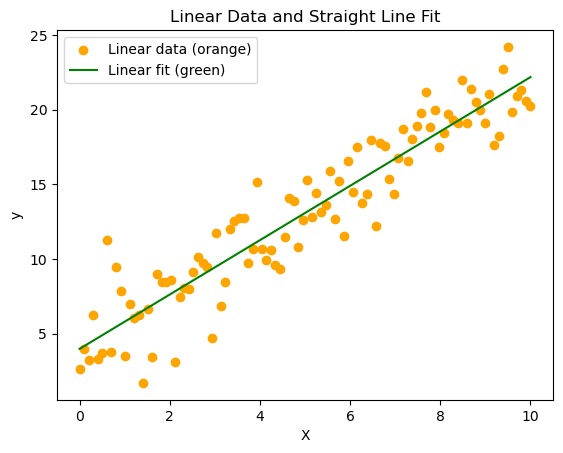
Figure C1 : Example of data (orange dots) that can be represented (fit) by a straight line (green
line).
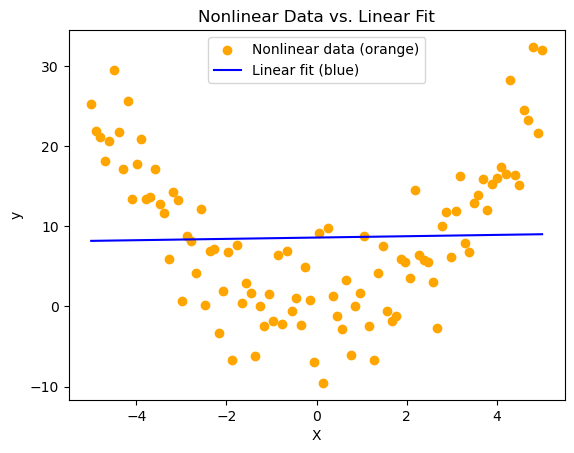

Figure C2 : Example of data (orange dots) that is not well fit by a straight line.


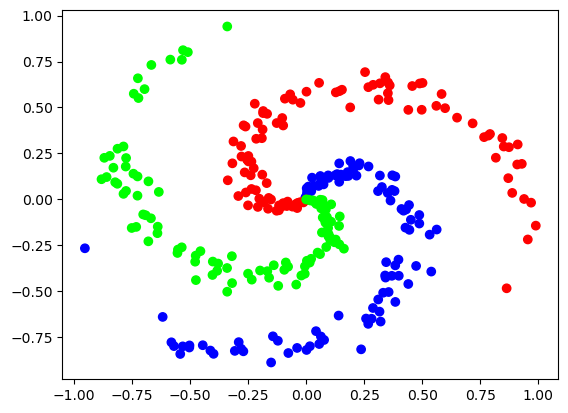

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def create_spiral_data(points_per_class, num_classes):
    # Initialize empty arrays for features (X) and labels (y)
    X = np.zeros((points_per_class * num_classes, 2))  # Features (x1, x2)
    y = np.zeros(points_per_class * num_classes, dtype='uint8')  # Class labels

    # Generate spiral data
    for class_number in range(num_classes):
        ix = range(points_per_class * class_number, points_per_class * (class_number + 1))
        r = np.linspace(0.0, 1, points_per_class)  # Radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points_per_class) + np.random.randn(points_per_class) * 0.2  # Theta (angle)
        
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number

    return X, y

# Example usage
X, y = create_spiral_data(100, 3)

# Plot the generated spiral data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()


Keep in mind that the neural network will not be aware of the color differences as the data have
no class encodings. This is only made as an instruction for the reader. In the data above, each dot
is the feature, and its coordinates are the samples that form the dataset. The “classification” for
that dot has to do with which spiral it is a part of, depicted by blue, green, or red color in the
previous image. These colors would then be assigned a class number for the model to fit to, like 0,
1, and 2.


### Dense Layer Class

Now that we no longer need to hand-type our data, we should create something similar for our
various types of neural network layers. So far, we’ve only used what’s called a ​ dense​ or
fully-connected​ layer. These layers are commonly referred to as “dense” layers in papers,
literature, and code, but you will occasionally see them called fully-connected or “fc” for short in
code. Our dense layer class will begin with two methods.

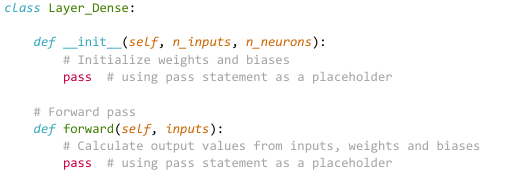


As previously stated, weights are often initialized randomly for a model, but not always. If you
wish to load a pre-trained model, you will initialize the parameters to whatever that pretrained
model finished with. It’s also possible that, even for a new model, you have some other
initialization rules besides random. For now, we’ll stick with random initialization. Next, we have
the ​ forward ​ method. When we pass data through a model from beginning to end, this is called a
forward pass​ . Just like everything else, however, this is not the only way to do things. You can
have the data loop back around and do other interesting things. We’ll keep it usual and perform a
regular forward pass.
To continue the ​ Layer_Dense​ class’ code let’s add the random initialization of weights and
biases:

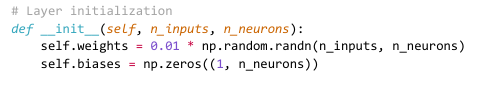
Here, we’re setting weights to be random and biases to be 0. Note that we’re initializing weights
to be ​ (inputs, neurons), r ​ ather than (​ neurons, inputs) ​ . We’re doing this ahead instead of
transposing every time we perform a forward pass, as explained in the previous chapter. Why zero
biases? In specific scenarios, like with many samples containing values of 0, a bias can ensure
that a neuron fires initially. It sometimes may be appropriate to initialize the biases to some
non-zero number, but the most common initialization for biases is 0. However, in these scenarios,
you may find success in doing things another way. This will vary depending on your use-case and
is just one of many things you can tweak when trying to improve results. One situation where you
might want to try something else is with what’s called ​ dead neurons​ . We haven’t yet covered
activation functions in practice, but imagine our step function again


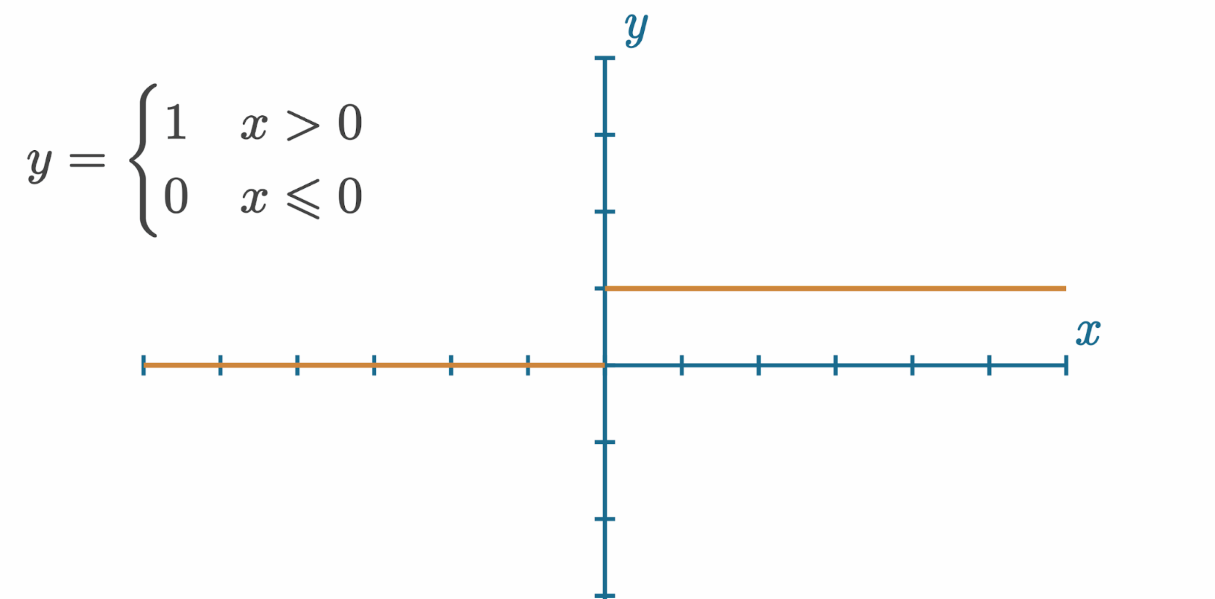

It’s possible for ​ weights · inputs + biases ​ not to meet the threshold of the step function, which
means the neuron will output a 0. Alone, this is not a big issue, but it becomes a problem if this
happens to this neuron for every one of the input samples (it’ll become clear why once we cover
backpropagation). So then this neuron’s 0 output is the input to another neuron. Any weight
multiplied by zero will be zero. With an increasing number of neurons outputting 0, more inputs
to the next neurons will receive these 0s rendering the network essentially non-trainable, or
“dead.”
Next, let’s explore ​ np.random.randn​ a ​ nd ​ np.zeros​ ​ in more detail. These methods are
convenient ways to initialize arrays. ​ np.random.randn​ ​ produces a Gaussian distribution with a
mean of 0 and a variance of 1, which means that it’ll generate random numbers, positive and
negative, centered at 0 and with the mean value close to 0. In general, neural networks work best
with values between -1 and +1, which we’ll discuss in an upcoming chapter. So this
np.random.randn​ g ​ enerates values around those numbers. We’re going to multiply this
Gaussian distribution for the weights by ​ 0.01 ​ to generate numbers that are a couple of
magnitudes smaller. Otherwise, the model will take more time to fit the data during the training
process as starting values will be disproportionately large compared to the updates being made.

during training. The idea here is to start a model with non-zero values small enough that they
won’t affect training. This way, we have a bunch of values to begin working with, but hopefully
none too large or as zeros. You can experiment with values other than ​ 0.01 ​ if you like.
Finally, the ​ np.random.randn​ function takes dimension sizes as parameters and creates the
output array with this shape. The weights here will be the number of inputs for the first dimension
and the number of neurons for the 2nd dimension. This is similar to our previous made up array of
weights, just randomly generated. Whenever there’s a function or block of code that you’re not
sure about, you can always print it out. For example:



In [7]:
import numpy as np

# Parameters for layer initialization
n_inputs = 2
n_neurons = 4

# Initialize weights with random normal distribution scaled by 0.01
weights = 0.01 * np.random.randn(n_inputs, n_neurons)

# Initialize biases as zeros with shape (1, n_neurons)
biases = np.zeros((1, n_neurons))

# Print the initialized weights and biases
print("Weights:")
print(weights)
print("Biases:")
print(biases)


Weights:
[[ 0.01484181 -0.01045875  0.01476386  0.01131062]
 [-0.00227454 -0.02080716  0.00042368  0.00287049]]
Biases:
[[0. 0. 0. 0.]]


The example function call has returned a 2x5 array (which we can also say is “​ with a shape of
(2,5) ” ​ ) with data randomly sampled from a Gaussian distribution with a mean of 0.
Next, the ​ np.zeros​ function takes a desired array shape as an argument and returns an array of
that shape filled with zeros.

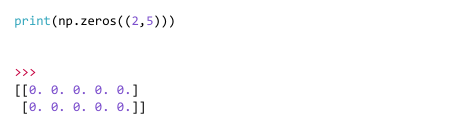

To see an example of how our method initializes weights and biases:
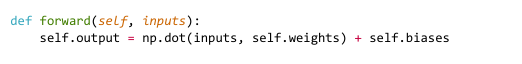

Nothing new here, just turning the previous code into a method. Our full ​ Layer_Dense ​ class so far:

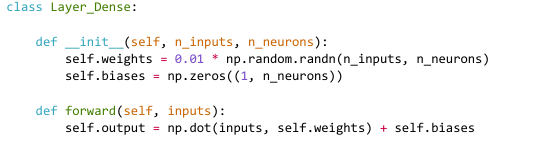

We’re ready to make use of this new class instead of hardcoded calculations, so let’s generate
some data using the discussed dataset creation method and use our new layer to perform a
forward pass:

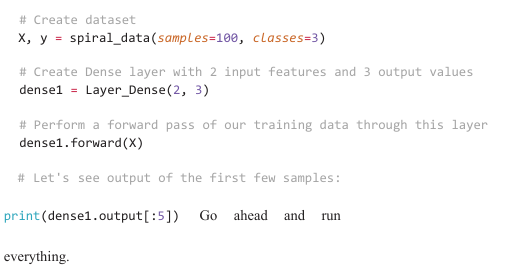


In [5]:
import numpy as np

# Define a class for a fully connected (dense) layer
class Layer_Dense:
    # Layer initialization: n_inputs defines the number of inputs, n_neurons defines the number of neurons
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights randomly with shape (n_inputs, n_neurons)
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        # Initialize biases as zeros (1 bias per neuron)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass method: computes output using inputs, weights, and biases
    def forward(self, inputs):
        # Compute the output of the layer (dot product of inputs and weights + biases)
        self.output = np.dot(inputs, self.weights) + self.biases
# Create a layer with 4 inputs and 3 neurons
layer = Layer_Dense(4, 3)

# Example input data (a batch with 2 samples, each with 4 features)
inputs = np.array([[1, 2, 3, 2.5],
                   [2, 5, -1, 2]])

# Perform a forward pass
layer.forward(inputs)

# Print the output of the layer
print(layer.output)


[[-0.07368627 -0.028905   -0.03915894]
 [-0.02494522 -0.03886429  0.01336336]]


### `__init__` method:
- **n_inputs**: The number of inputs to the layer.
- **n_neurons**: The number of neurons in the layer.
- Weights are initialized randomly with a small value multiplied by a random normal distribution to avoid large initial values. The shape of the weights matrix is `(n_inputs, n_neurons)`.
- Biases are initialized to zero, with shape `(1, n_neurons)` since each neuron has a corresponding bias.

### `forward` method:
- Takes **inputs** (a batch of data) and computes the output using the dot product of inputs and weights, and then adds the biases.
- The result is stored in `self.output`.
